# Orientation representation activity of naive mice during task
Given the data of naive mice provided by Corbo, let's examine their orientation representation activity.

## Imports

In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/home/jovyan/work/task-priors


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.data_compilation import NAIVE

from src.data_access import (
load_tables, 
retrieve_experiment_ids, 
retrieve_recording_day_experiment_ids, 
construct_testing_trial_bank, 
retrieve_admissible_neurons, 
)

from src.orientation_representation import (
load_all_experiments_into_memory,
construct_orientation_representation,
plot_orientation_representation,
)

In [3]:
tables = load_tables(DATASET=NAIVE)
df_celltable, df_trialtable = tables
experiment_ids = retrieve_experiment_ids(tables)

In [4]:
trial_length = 105

## Functionalized stimulus query

In [5]:
def stimulus_experimental_condition_query(recording_day, visual_stimulus, title, save_fig=False):
    relevant_experiment_ids = retrieve_recording_day_experiment_ids(recording_day, tables)
    trial_bank = construct_testing_trial_bank(relevant_experiment_ids, recording_day, visual_stimulus, tables)
    
    admissible_neurons = retrieve_admissible_neurons(
        relevant_experiment_ids, 
        tables, 
        fit_key='Best_Fit_spikes_1',
        orientation_key='Pref_Orientation_spikes_1',
    )
    experiment_data = load_all_experiments_into_memory(trial_bank, DATASET=NAIVE, tqdm_disable=False)

    trial_matrix = construct_orientation_representation(admissible_neurons, experiment_data, trial_length, tqdm_disable=False)
    plot_orientation_representation(trial_matrix, title, save_fig=save_fig)

## Test queries

100%|█████████████████████████████████████████████| 7/7 [01:09<00:00,  9.89s/it]
3615it [00:03, 1175.47it/s]


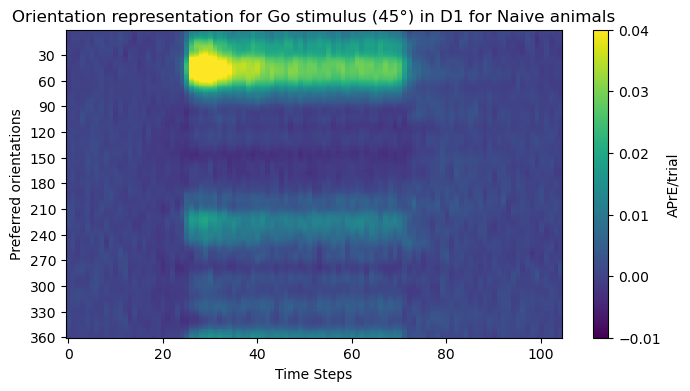

In [6]:
## D1 and 45°
stimulus_experimental_condition_query('D1', 45, 'Orientation representation for Go stimulus (45°) in D1 for Naive animals',)

100%|█████████████████████████████████████████████| 7/7 [01:20<00:00, 11.57s/it]
3836it [00:03, 1160.42it/s]


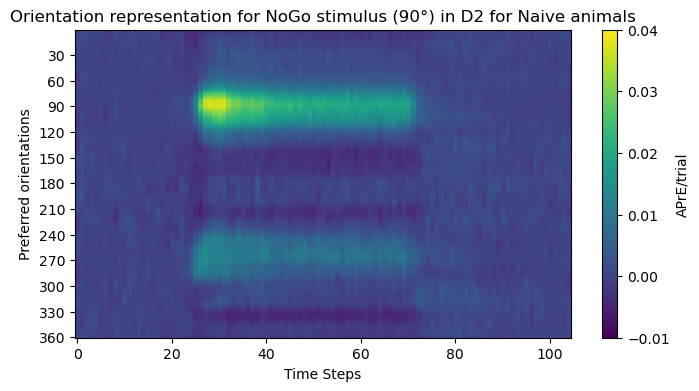

In [7]:
## D2 and 90°
stimulus_experimental_condition_query('D2', 90, 'Orientation representation for NoGo stimulus (90°) in D2 for Naive animals',)

100%|█████████████████████████████████████████████| 7/7 [01:07<00:00,  9.70s/it]
2851it [00:02, 1112.43it/s]


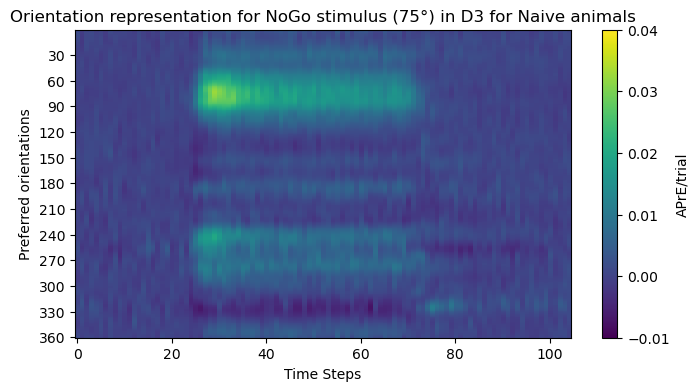

In [8]:
## D3 and 75°
stimulus_experimental_condition_query('D3', 75, 'Orientation representation for NoGo stimulus (75°) in D3 for Naive animals',)

100%|█████████████████████████████████████████████| 7/7 [01:07<00:00,  9.66s/it]
3129it [00:02, 1147.19it/s]


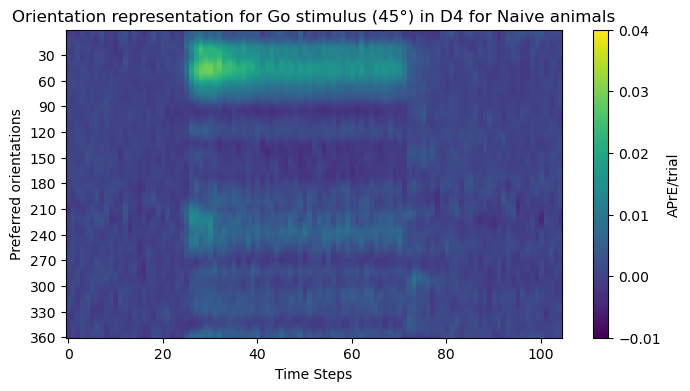

In [9]:
## D4 and 45°
stimulus_experimental_condition_query('D4', 45, 'Orientation representation for Go stimulus (45°) in D4 for Naive animals',)

100%|█████████████████████████████████████████████| 7/7 [01:10<00:00, 10.03s/it]
3239it [00:02, 1237.04it/s]


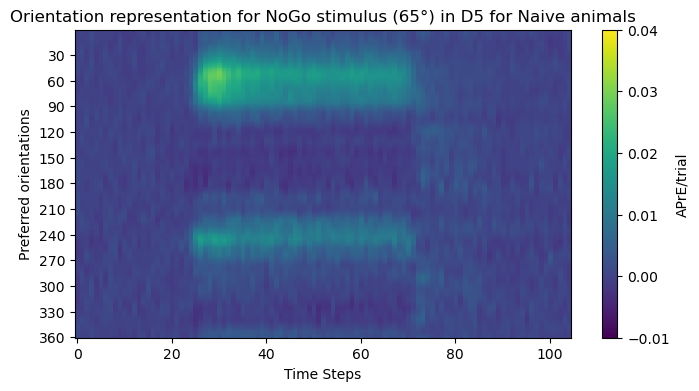

In [10]:
## D5 and 65°
stimulus_experimental_condition_query('D5', 65, 'Orientation representation for NoGo stimulus (65°) in D5 for Naive animals',)

100%|█████████████████████████████████████████████| 7/7 [01:13<00:00, 10.44s/it]
3276it [00:02, 1154.61it/s]


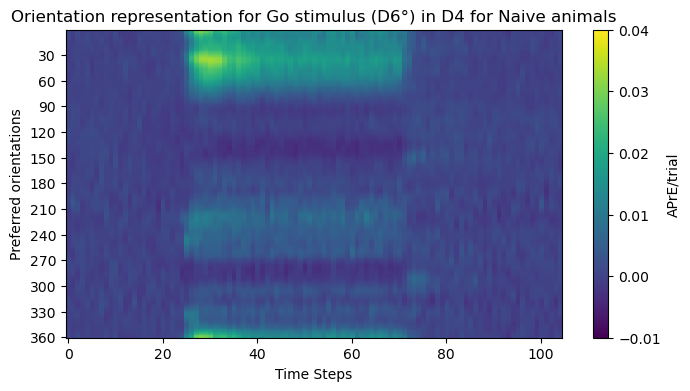

In [11]:
## D6 and 45°
stimulus_experimental_condition_query('D6', 45, 'Orientation representation for Go stimulus (D6°) in D4 for Naive animals',)

## Aggregate orientation representation figure

In [12]:
def raw_stimulus_experimental_condition_query(recording_day, visual_stimulus,):
    relevant_experiment_ids = retrieve_recording_day_experiment_ids(recording_day, tables)
    trial_bank = construct_testing_trial_bank(relevant_experiment_ids, recording_day, visual_stimulus, tables)
    
    admissible_neurons = retrieve_admissible_neurons(
        relevant_experiment_ids, 
        tables, 
        fit_key='Best_Fit_spikes_1',
        orientation_key='Pref_Orientation_spikes_1',
    )
    experiment_data = load_all_experiments_into_memory(trial_bank, DATASET=NAIVE,)

    trial_matrix = construct_orientation_representation(admissible_neurons, experiment_data, trial_length,)
    return trial_matrix

In [13]:
trial_matrices = np.zeros((12, 360, trial_length,))

experimental_conditions = [
    ('D1', 45,),
    ('D1', 135,),
    ('D2', 45,),
    ('D2', 90,),
    ('D3', 45,),
    ('D3', 75,),
    ('D4', 45,),
    ('D4', 70,),
    ('D5', 45,),
    ('D5', 65,),
    ('D6', 45,),
    ('D6', 60,),
]

In [14]:
for ind, exp_cond in tqdm(enumerate(experimental_conditions)):
    trial_matrix = raw_stimulus_experimental_condition_query(exp_cond[0], exp_cond[1],)
    trial_matrices[ind] = trial_matrix

12it [16:39, 83.32s/it]


In [15]:
np.save('./data/Naive_numpy_arrays/task_aggregated_matrices.npy', trial_matrices)

/tmp/ipykernel_16601/77566220.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to make room for the colorbar


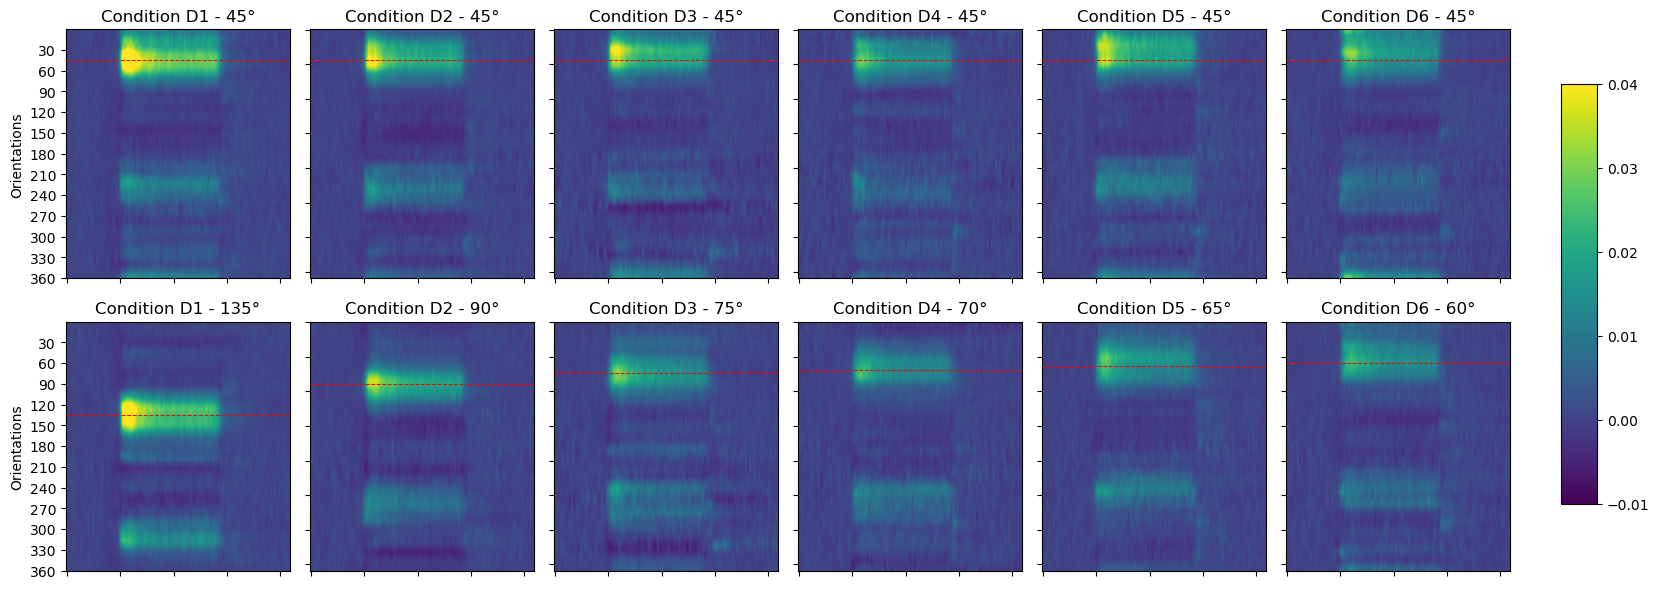

In [16]:
# Assume trial_matrices and experimental_conditions are initialized
fig, axs = plt.subplots(2, 6, figsize=(18, 6))  # Adjust the figsize if needed

for i in range(6):
    exp_cond_45 = experimental_conditions[2 * i]  # even indices
    exp_cond_non_45 = experimental_conditions[2 * i + 1]  # odd indices

    # 45 degrees condition
    ax1 = axs[0, i]
    matrix_45 = trial_matrices[2 * i]  # even indices
    im1 = ax1.imshow(matrix_45, aspect='auto', cmap='viridis', vmin=-0.01, vmax=0.04)
    ax1.set_title(f'Condition D{i + 1} - {exp_cond_45[1]}°')
    ax1.axhline(y=exp_cond_45[1]-1, color='red', linestyle='--', linewidth=0.74)  # Adjust for zero-based index

    # Non-45 degrees condition
    ax2 = axs[1, i]
    matrix_non_45 = trial_matrices[2 * i + 1]  # odd indices
    im2 = ax2.imshow(matrix_non_45, aspect='auto', cmap='viridis', vmin=-0.01, vmax=0.04)
    ax2.set_title(f'Condition D{i + 1} - {exp_cond_non_45[1]}°')
    ax2.axhline(y=exp_cond_non_45[1]-1, color='red', linestyle='--', linewidth=0.75)  # Adjust for zero-based index

    # Only the first column keeps the y-axis labels
    if i > 0:
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])

# Adjust y-axis ticks for the first column
y_ticks = np.arange(29, 360, 30)  # Ticks starting from 30 to 360 with steps of 30
for ax in axs[:, 0]:
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks + 1)  # Adjust tick labels for zero-based indexing
    ax.set_ylabel('Orientations')

# Hide x-tick labels for all
for ax in axs.flat:
    ax.set_xticklabels([])

# Add a colorbar to the right of the subplots
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # Adjust these parameters to fit the colorbar appropriately
fig.colorbar(im1, cax=cbar_ax)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to make room for the colorbar
plt.savefig('./results/orientation_representations/naive_task_orientation_representations.png')
plt.show()